In [74]:
import pygrib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.basemap import Basemap
import numpy as np
%matplotlib inline

In [9]:
grbs = pygrib.open("../20130202.grb")
temp_layer = grbs[211]
print temp_layer
print temp_layer.values.shape
print map(lambda x: x.shape, temp_layer.latlons())
print temp_layer.latlons()[0][0,0]
print temp_layer.latlons()[1][0,0]
print temp_layer.latlons()[0][0,1]
print temp_layer.latlons()[1][0,1]
print temp_layer.latlons()[0][1,0]
print temp_layer.latlons()[1][1,0]

211:Temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 201302020000
(361, 720)
[(361, 720), (361, 720)]
90.0
0.0
90.0
0.5
89.5
0.0


In [10]:
# Ok, wtf is going on with the gap between july 25 and july 26?
grbs0725 = pygrib.open("../20130725.grb")
for layer in grbs0725:
    print layer

1:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 0 hrs:from 201307250000
2:V component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 0 hrs:from 201307250000
3:Ventilation Rate:m**2 s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 0 hrs:from 201307250000
4:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 0 hrs:from 201307250000
5:Temperature:K (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 0 hrs:from 201307250000
6:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 0 hrs:from 201307250000
7:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 0 hrs:from 201307250000
8:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 0 hrs:from 201307250000
9:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 0 hrs:from 201307250000
10:Ozone mixing ratio:kg kg**-1 (ins

In [12]:
grbs0726 = pygrib.open("../20130726.grb")
for layer in grbs0726:
    print layer
# Looks like  there's a "wind speed" layer here at 4 that trips stuff up. however, it gets 
# corrected by the end, so maybe it's just this layer that's put elsewhere. Very odd.

1:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 0 hrs:from 201307260000
2:V component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 0 hrs:from 201307260000
3:Ventilation Rate:m**2 s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 0 hrs:from 201307260000
4:Wind speed (gust):m s**-1 (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 201307260000
5:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 0 hrs:from 201307260000
6:Temperature:K (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 0 hrs:from 201307260000
7:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 0 hrs:from 201307260000
8:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 0 hrs:from 201307260000
9:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 0 hrs:from 201307260000
10:Absolute vorticity:s**-1 (instant):regular_l

In [52]:
# OK, so how do we uniquely identify the layer of interest? We want layer name = Temperature,
# regular_ll (eg typeOfLevel) = surface, and level = 0. See if this is a unique layer everywhere
grbs0725 = pygrib.open("../20130725.grb")
            
for i,layer in enumerate(grbs0725):
    if layer.name == "Temperature" and layer.typeOfLevel == "surface":
        if layer.level == 0:
            print "layer %d has all 3" % (i+1)
        else:
            print "layer %d has 2" % (i+1)
print 'done'

grbs0726 = pygrib.open("../20130726.grb")
            
for i,layer in enumerate(grbs0726):
    if layer.name == "Temperature" and layer.typeOfLevel == "surface":
        if layer.level == 0:
            print "layer %d has all 3" % (i+1)
        else:
            print "layer %d has 2" % (i+1)
print 'done'

layer 211 has all 3
done
layer 212 has all 3
done


In [201]:
grbs0725 = pygrib.open("20130725.grb")
for i,layer in enumerate(grbs0725):
    #if layer.name == "Relative humidity" and layer.level == 0:# and layer.typeOfLevel == "unknown":
    #if layer.name == 'Surface air relative humidity':
    if "loud" in layer.name:
        print layer
# ok wtf is the difference
#layer1 = grbs0725[234]
#layer2 = grbs0725[273]
#for key in layer1.keys():
#    try:
#        if layer1[key] != layer2[key]:
#            print "%s\t%s\t%s" %(key, str(layer1[key]), str(layer2[key]))
#    except Exception as e:
#        print "failed because " + str(e)

45:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 10000 Pa:fcst time 0 hrs:from 201307250000
54:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 15000 Pa:fcst time 0 hrs:from 201307250000
62:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 20000 Pa:fcst time 0 hrs:from 201307250000
70:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 25000 Pa:fcst time 0 hrs:from 201307250000
78:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 30000 Pa:fcst time 0 hrs:from 201307250000
86:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 35000 Pa:fcst time 0 hrs:from 201307250000
94:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 40000 Pa:fcst time 0 hrs:from 201307250000
102:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 45000 Pa:fcst time 0 hrs:from 201307250000
110:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:lev

In [70]:
grbs0725 = pygrib.open("../20130725.grb")
            
for i,layer in enumerate(grbs0725):
    if layer.name == "Relative humidity" and layer.level == 0 \
        and layer.typeOfLevel == "unknown" and layer.typeOfFirstFixedSurface == '200':
        print "layer %d" % (i+1)
        print "toffs: " + str(layer.typeOfFirstFixedSurface == '200')

grbs0726 = pygrib.open("../20130726.grb")
            
for i,layer in enumerate(grbs0726):
    if layer.name == "Relative humidity" and layer.level == 0 \
        and layer.typeOfLevel == "unknown" and layer.typeOfFirstFixedSurface == '200':
        print "layer %d" % (i+1)
        print "toffs: " + str(layer.typeOfFirstFixedSurface)

layer 234
toffs: True
layer 235
toffs: 200


In [76]:
vals = layer1.values
lats,lons = layer1.latlons()
print "val shape: %s\tlat shape: %s\tlon shape: %s" %(str(vals.shape), str(lats.shape), str(lons.shape))
print lons[0,:]

val shape: (361, 720)	lat shape: (361, 720)	lon shape: (361, 720)
[   0.     0.5    1.     1.5    2.     2.5    3.     3.5    4.     4.5
    5.     5.5    6.     6.5    7.     7.5    8.     8.5    9.     9.5
   10.    10.5   11.    11.5   12.    12.5   13.    13.5   14.    14.5
   15.    15.5   16.    16.5   17.    17.5   18.    18.5   19.    19.5
   20.    20.5   21.    21.5   22.    22.5   23.    23.5   24.    24.5
   25.    25.5   26.    26.5   27.    27.5   28.    28.5   29.    29.5
   30.    30.5   31.    31.5   32.    32.5   33.    33.5   34.    34.5
   35.    35.5   36.    36.5   37.    37.5   38.    38.5   39.    39.5
   40.    40.5   41.    41.5   42.    42.5   43.    43.5   44.    44.5
   45.    45.5   46.    46.5   47.    47.5   48.    48.5   49.    49.5
   50.    50.5   51.    51.5   52.    52.5   53.    53.5   54.    54.5
   55.    55.5   56.    56.5   57.    57.5   58.    58.5   59.    59.5
   60.    60.5   61.    61.5   62.    62.5   63.    63.5   64.    64.5
   65.    6

plot_bb: [70, 38, 390, 444]


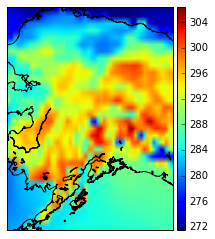

In [102]:
temp_vals = grbs0725.select(name='Temperature', typeOfLevel='surface')[0].values
ak_bb = [55,71,-165,-138]
plot_bb_0 = np.where(lats[:,0] <= ak_bb[0])[0][0]
plot_bb_1 = np.where(lats[:,0] <= ak_bb[1])[0][0]
plot_bb_2 = np.where(lons[0,:] >= (ak_bb[2] % 360))[0][0]
plot_bb_3 = np.where(lons[0,:] >= (ak_bb[3] % 360))[0][0]
plot_bb = [plot_bb_0, plot_bb_1, plot_bb_2, plot_bb_3]
print "plot_bb: " + str(plot_bb)
mp = Basemap(projection="merc",
              lat_0=55, lon_0=-165,
              llcrnrlat=55,
              llcrnrlon=-165,
              urcrnrlat=71,
              urcrnrlon=-138,
              resolution='i')
mp.drawcoastlines()
mp.imshow(temp_vals[plot_bb_0-1:plot_bb_1-1:-1, plot_bb_2:plot_bb_3])
mp.colorbar()

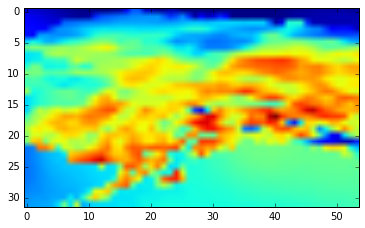

In [100]:
plt.imshow(temp_vals[38:70,390:444])

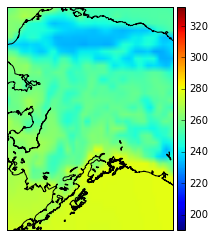

In [111]:
# Let's try our new function
import os
os.chdir('/Users/zbutler/research/fire_prediction')
import plotting.plot_map as pm
import cPickle
with open('data/temp_2013.pkl') as fpkl:
    temp_dict = cPickle.load(fpkl)
pm.draw_map_nogrid_static(ak_bb, month=1, day=9, gfs_dict=temp_dict)

butts 10


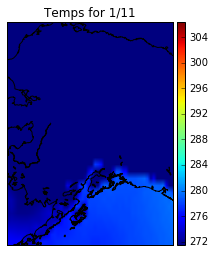

In [145]:
# try to make an animated thingy
def day2monthday(my_day, leapyear=False):
    if leapyear:
        month_arr = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    else:
        month_arr = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    month = 1
    days_left = my_day
    while days_left >= month_arr[month-1]:
        days_left -= month_arr[month-1]
        month += 1
    day = days_left + 1
    return month,day
    
def monthday2day(month, day, leapyear=False):
    """Convert month/day into days since Jan 1"""
    if leapyear:
        month_arr = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    else:
        month_arr = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    days = 0
    for mon in xrange(1, month):
        days += month_arr[mon - 1]
    days += day - 1
    return days

def update(i):
    monthday = day2monthday(i)
    temp_vals = temp_dict[monthday]
    im.set_data(temp_vals[plot_bb_0-1:plot_bb_1-1:-1, plot_bb_2:plot_bb_3])
    plt.title("Temps for %d/%d" %monthday)
    print "butts " + str(i)
    return im,
             
fig,ax = plt.subplots()
mp = Basemap(projection="merc",
              lat_0=55, lon_0=-165,
              llcrnrlat=55,
              llcrnrlon=-165,
              urcrnrlat=71,
              urcrnrlon=-138,
              resolution='i')
im = mp.imshow(temp_vals[plot_bb_0-1:plot_bb_1-1:-1, plot_bb_2:plot_bb_3], animated=True)
mp.drawcoastlines()
mp.colorbar()

anim = FuncAnimation(fig, update, frames=range(10,20), interval=200, blit=True)

In [150]:
# animation round 2: save a bunch of pics and use mac's "convert" to turn them into a gif
mp = Basemap(projection="merc",
              lat_0=55, lon_0=-165,
              llcrnrlat=55,
              llcrnrlon=-165,
              urcrnrlat=71,
              urcrnrlon=-138,
              resolution='i')
start_day = monthday2day(6,1)
end_day = monthday2day(9,1)
min_temp = temp_dict['min']
max_temp = temp_dict['max']
for dayy in xrange(start_day, end_day):
    monthday = day2monthday(dayy)
    temp_vals = temp_dict[monthday]
    mp.imshow(temp_vals[plot_bb_0-1:plot_bb_1-1:-1, plot_bb_2:plot_bb_3],
              vmin=min_temp, vmax=max_temp)
    plt.title("Temps for %d/%d" %monthday)
    mp.drawcoastlines()
    mp.colorbar()
    plt.savefig('gifmaking/day%d.png' % dayy)
    plt.close()

os.system('convert -delay 100 -loop 0 gifmaking/day*.png gifmaking/temp_loop_2013.gif')
print "done"

done


In [151]:
# Now let's do humidity
with open('data/hum_2013.pkl') as fpkl:
    hum_dict = cPickle.load(fpkl)
mp = Basemap(projection="merc",
              lat_0=55, lon_0=-165,
              llcrnrlat=55,
              llcrnrlon=-165,
              urcrnrlat=71,
              urcrnrlon=-138,
              resolution='i')
start_day = monthday2day(6,1)
end_day = monthday2day(9,1)
min_hum = hum_dict['min']
max_hum = hum_dict['max']
for dayy in xrange(start_day, end_day):
    monthday = day2monthday(dayy)
    hum_vals = hum_dict[monthday]
    mp.imshow(hum_vals[plot_bb_0-1:plot_bb_1-1:-1, plot_bb_2:plot_bb_3],
              vmin=min_hum, vmax=max_hum)
    plt.title("Humidity for %d/%d" %monthday)
    mp.drawcoastlines()
    mp.colorbar()
    plt.savefig('gifmaking/day%d.png' % dayy)
    plt.close()

os.system('convert -delay 100 -loop 0 gifmaking/day*.png gifmaking/humidity_loop_2013.gif')
print "done"

done


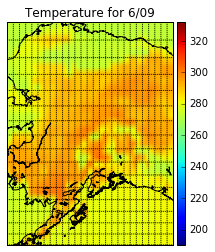

In [167]:
# let's try drawing gridlines
meridians = np.arange(ak_bb[2], ak_bb[3], 1)  # 111km in a degree
parallels = np.arange(ak_bb[0], ak_bb[1], 1)  # 111km in a degree
mp = Basemap(projection="merc",
              lat_0=55, lon_0=-165,
              llcrnrlat=55,
              llcrnrlon=-165,
              urcrnrlat=71,
              urcrnrlon=-138,
              resolution='i')
temp_vals = temp_dict[(6,9)]
mp.imshow(temp_vals[plot_bb_0-1:plot_bb_1-1:-1, plot_bb_2:plot_bb_3],
              vmin=min_temp, vmax=max_temp)
mp.drawparallels(parallels)
mp.drawmeridians(meridians)
mp.drawcoastlines()
mp.colorbar()
plt.title("Temperature for 6/09")
plt.show()

In [169]:
with open("data/modis.pkl") as fpd:
    modis = cPickle.load(fpd)

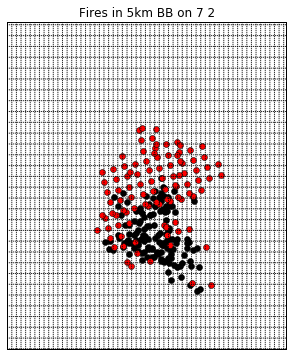

KeyboardInterrupt: 

In [172]:
# individual fire plot with grid
from IPython import display
fire_bb = [64.6, 64.9, -147, -146.4]
meridians = np.arange(fire_bb[2], fire_bb[3], 1.1/111)  # 111km in a degree
parallels = np.arange(fire_bb[0], fire_bb[1], 1.1/111)  # 111km in a degree
mp = Basemap(projection="merc",
              lat_0=float(fire_bb[0]+fire_bb[1])/2, lon_0=float(fire_bb[2]+fire_bb[3])/2,
              llcrnrlat=fire_bb[0],
              llcrnrlon=fire_bb[2],
              urcrnrlat=fire_bb[1],
              urcrnrlon=fire_bb[3],
              resolution='i')
my_fires = modis[(modis.lat < fire_bb[1]) & (modis.lat > fire_bb[0]) &
                 (modis.long < fire_bb[3]) & (modis.long > fire_bb[2])]
month = 6
day = 25
prev_lats = []
prev_longs = []
while month < 8 or day < 12:
    todays_fires = my_fires[(my_fires.year == 2013) & (my_fires.month == month) &
                            (my_fires.day == day)]
    display.clear_output(wait=True)
    plt.figure(figsize=(5,10))
    mp.drawcoastlines()
    if len(prev_lats):
        mp.plot(prev_longs, prev_lats, 'ko')
    if len(todays_fires):
        today_longs, today_lats = mp(np.array(todays_fires.long), np.array(todays_fires.lat))
        mp.plot(today_longs, today_lats, 'ro')
        prev_lats += list(today_lats)
        prev_longs += list(today_longs)
    mp.drawparallels(parallels)
    mp.drawmeridians(meridians)
    plt.title("Fires in 5km BB on %d %d" %(month, day))
    plt.show()
    raw_input("hit enter")
    day += 1
    if day >= 31 or (day >= 30 and month == 6):
        day = 1
        month += 1

In [191]:
import matplotlib.patches as patches
# individual fire plot with grid and cells
fire_bb = [64.6, 64.9, -147, -146.4]
meridians = np.arange(fire_bb[2], fire_bb[3], 1.1/111)  # 111km in a degree
parallels = np.arange(fire_bb[0], fire_bb[1], 1.1/111)  # 111km in a degree
my_fires = modis[(modis.lat < fire_bb[1]) & (modis.lat > fire_bb[0]) &
                 (modis.long < fire_bb[3]) & (modis.long > fire_bb[2])]

yolo
plotlat, plotlon (44366.754839587891, 23629.90969092399)
Rectangle(44077.2,23158.9;0.00990991x0.00990991)
(array([ 56198.49051684,  57300.42170345,  58402.35289005,  59504.28407665,
        60606.21526326,  61708.14644986,  62810.07763647,  63912.00882307,
        65013.94000968,  66115.87119628]), array([ 54156.35922709,  56745.64763833,  59335.88872078,  61927.08325326,
        64519.23201553,  67112.33578824,  69706.39535299,  72301.41149229,
        74897.38498958,  77494.31662921]))
yolo 2


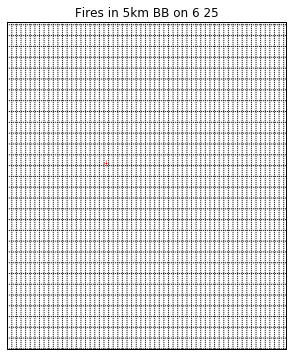

KeyboardInterrupt: 

In [192]:
mp = Basemap(projection="merc",
              lat_0=float(fire_bb[0]+fire_bb[1])/2, lon_0=float(fire_bb[2]+fire_bb[3])/2,
              llcrnrlat=fire_bb[0],
              llcrnrlon=fire_bb[2],
              urcrnrlat=fire_bb[1],
              urcrnrlon=fire_bb[3])
month = 6
day = 25
prev_lat_cells = []
prev_long_cells = []
while month < 8 or day < 12:
    todays_fires = my_fires[(my_fires.year == 2013) & (my_fires.month == month) &
                            (my_fires.day == day)]
    display.clear_output(wait=True)
    plt.figure(figsize=(5,10))
    mp.drawcoastlines()
#    if len(prev_lat_cells):
#        mp.plot(prev_long_cells, prev_lat_cells, 'ko')
    if len(todays_fires):
        today_longs, today_lats = np.array(todays_fires.long), np.array(todays_fires.lat)
        print 'yolo'
        for lon,lat in zip(today_longs, today_lats):
            lon_cell = np.where(meridians > lon)[0][0]
            lat_cell = np.where(parallels > lat)[0][0]
            plotlat, plotlon = mp(lon, lat)
            mp.plot(plotlon, plotlat, 'r+')
            print "plotlat, plotlon " + str((plotlat, plotlon))
            rect = patches.Rectangle(mp(meridians[lon_cell-1], parallels[lat_cell-1]), 1.1/111, 1.1/111, facecolor='red')
            print rect
            print mp(meridians[-10:], parallels[-10:])
            plt.gca().add_patch(rect)
            prev_lat_cells.append(lat_cell)
            prev_long_cells.append(lon_cell)
            break
        print 'yolo 2'
    mp.drawparallels(parallels)
    mp.drawmeridians(meridians)
    plt.title("Fires in 5km BB on %d %d" %(month, day))
    plt.show()
    raw_input("hit enter")
    day += 1
    if day >= 31 or (day >= 30 and month == 6):
        day = 1
        month += 1

In [ ]:
# time dependent plot
with open("modis.pkl") as fpkl:
    modis = cPickle.load(fpkl)
    
fire_bb = [64.6, 64.9, -147, -146.4]
meridians = np.arange(fire_bb[2], fire_bb[3], 1.1/111)  # 111km in a degree
parallels = np.arange(fire_bb[0], fire_bb[1], 1.1/111)  # 111km in a degree
mp = Basemap(projection="merc",
              lat_0=float(fire_bb[0]+fire_bb[1])/2, lon_0=float(fire_bb[2]+fire_bb[3])/2,
              llcrnrlat=fire_bb[0],
              llcrnrlon=fire_bb[2],
              urcrnrlat=fire_bb[1],
              urcrnrlon=fire_bb[3],
              resolution='i')
my_fires = modis[(modis.lat < fire_bb[1]) & (modis.lat > fire_bb[0]) &
                 (modis.long < fire_bb[3]) & (modis.long > fire_bb[2])]
month = 6
day = 25
prev_lats = []
prev_longs = []
while month < 8 or day < 12:
    todays_fires = my_fires[(my_fires.year == 2013) & (my_fires.month == month) &
                            (my_fires.day == day)]
    display.clear_output(wait=True)
    plt.figure(figsize=(5,10))
    mp.drawcoastlines()
    if len(prev_lats):
        mp.plot(prev_longs, prev_lats, 'ko')
    if len(todays_fires):
        today_longs, today_lats = mp(np.array(todays_fires.long), np.array(todays_fires.lat))
        today_times = np.array(today_fires.hour)
        mp.plot(today_longs, today_lats, c=today_times)
        prev_lats += list(today_lats)
        prev_longs += list(today_longs)
    mp.drawparallels(parallels)
    mp.drawmeridians(meridians)
    plt.title("Fires in 5km BB on %d %d" %(month, day))
    plt.show()
    raw_input("hit enter")
    day += 1
    if day >= 31 or (day >= 30 and month == 6):
        day = 1
        month += 1
